# Loading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# read the CSV file with a comma delimeter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum11/data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**menampilkan informasi detail dengan df.info()**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**cek missing value dan data duplikat**

In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**menampilkan statistika deskriptif dan dataset**

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**cek nilai pada kolom species**

In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**menghitung jumlah pada kolom species**

In [8]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Pemilihan fitur

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

In [10]:
# fitur untuk clustering
x = df.drop(["Id", "Species", "SpeciesEncoded"], axis=1)

In [11]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


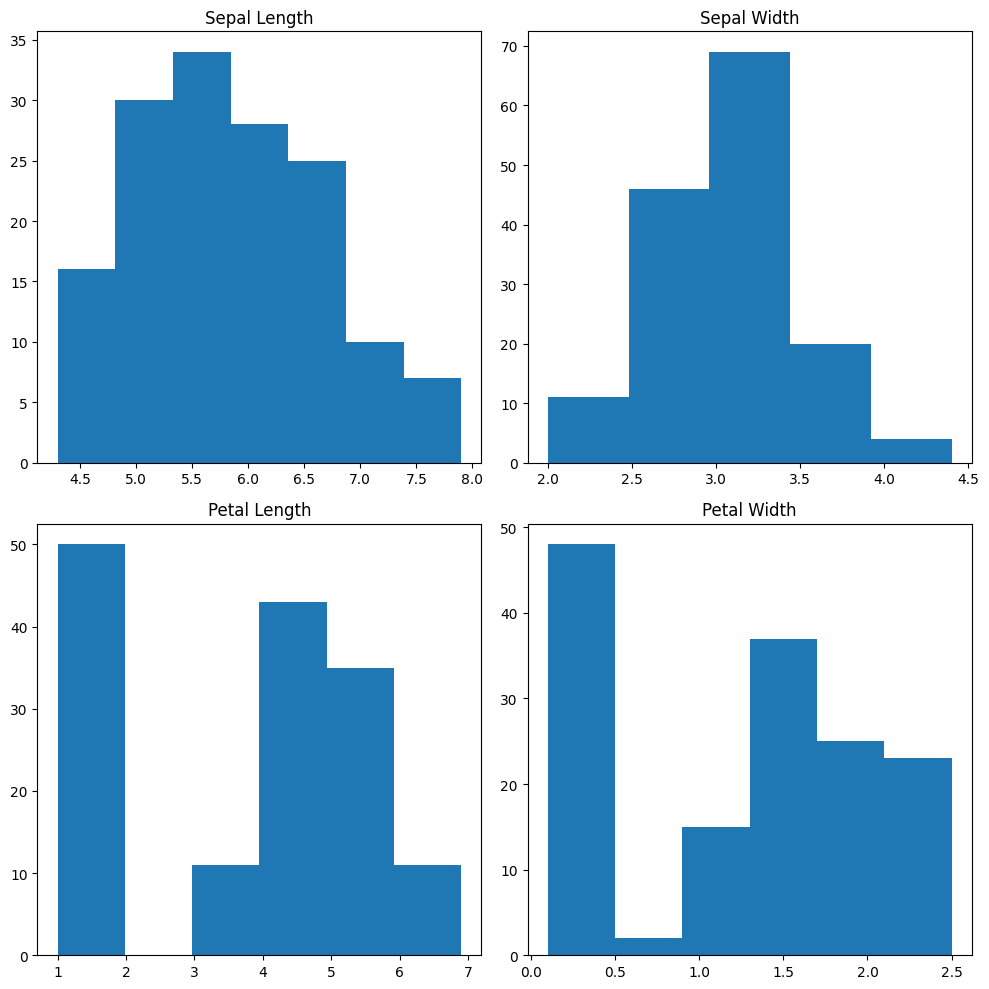

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1 : Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(x["SepalLengthCm"], bins=7)

# Histogram 2 : Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(x["SepalWidthCm"], bins=5)

# Histogram 1 : Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(x["PetalLengthCm"], bins=6)

# Histogram 1 : Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(x["PetalWidthCm"], bins=6)

plt.tight_layout()
plt.show()

**menentukan standar scaler**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Re-initialite X from the originial Dataframe 'df'
# This ensires X is a Dataframe with named columns for indxing before scalling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

X= scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Menentukan jumlah cluster (k) dengan elbow method

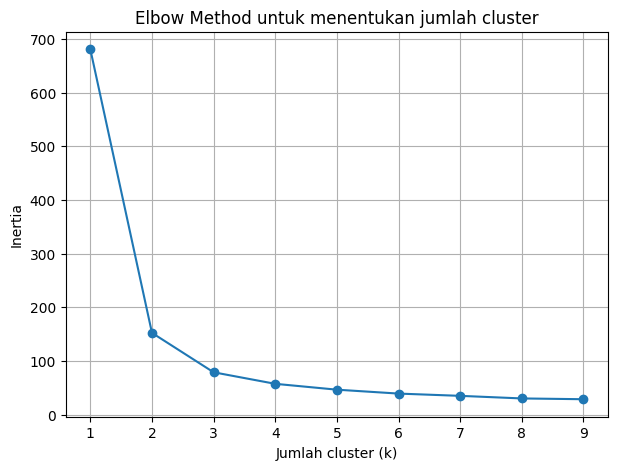

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk menentukan jumlah cluster")
plt.xlabel("Jumlah cluster (k)")
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Membangun model K-means

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    random_state=42
)

In [16]:
df["Cluster"] = kmeans.fit_predict(x)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 0 2]


# Evaluasi kualitas clustering

In [17]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(x, df["Cluster"])
print("\n===== SILHOUETTE SCORE =====")
print("Silhouette Score:", sil_score)


===== SILHOUETTE SCORE =====
Silhouette Score: 0.5509643746707443


# Confusion matrix (perbandingan dengan label asli)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n===== CONFUSION MATRIX =====")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)



===== CONFUSION MATRIX =====
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


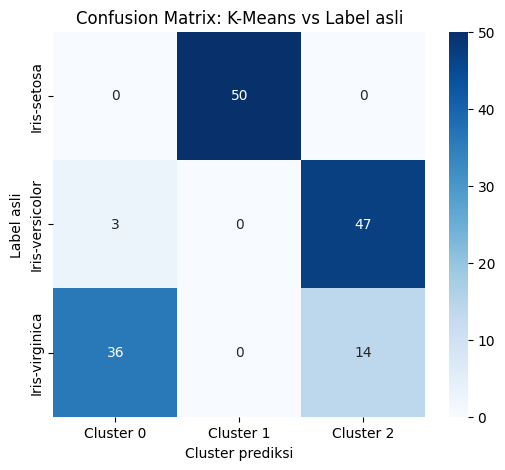

In [19]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
    yticklabels=le.classes_
)

plt.title("Confusion Matrix: K-Means vs Label asli")
plt.xlabel("Cluster prediksi")
plt.ylabel("Label asli")
plt.show()

# 2D dan 3D Visualisasi hasil model K-Means

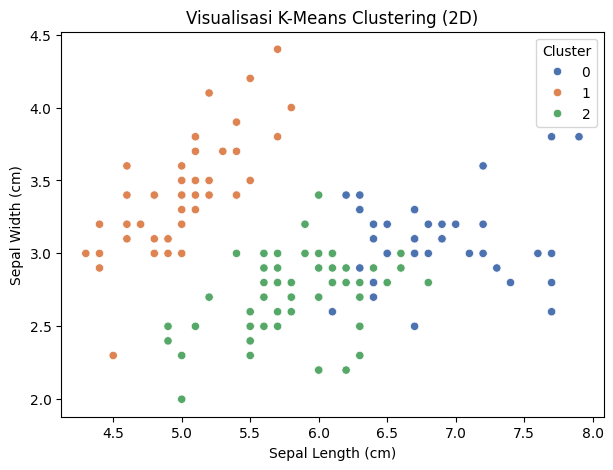

In [20]:
plt.figure(figsize = (7, 5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

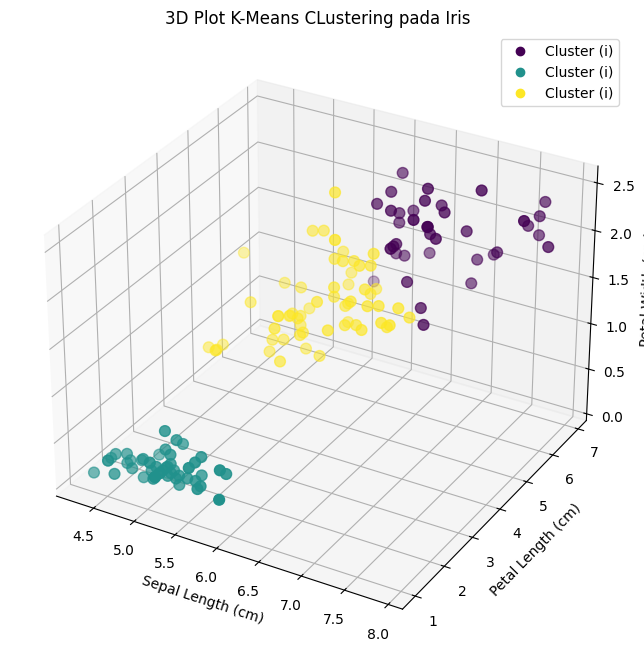

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means CLustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend Cluster
legend_labels = [f"Cluster (i)" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "jamilatunnisa996@gmail.com"
!git config --global user.name "Jamilatun Khoerunnisa"

!git clone https://github.com/Jamilatun/ti03_Mila_01101222254.git
%cd ti03_Mila_01101222254

!cp -r /content/drive/MyDrive/praktikum_ml/praktikum11/ ./praktikum11

!ls -lah

!git add .
!git commit -m "Upload folder praktikum11 dari Colab"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Jamilatun/ti03_Mila_01101222254.git')

!git push origin main